# Linear Algebra Meets Geometry

In this notebook we review interlocking elements of geometry, in particular projection on to dimensions as dot products, and the extension to matrices as tools of tranforming geometric represntations (e.g. Rotation).

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur with updates by Ross Beveridge

Last Update February 3, 2022

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


### *Support code*

Imports and useful local functions

In [1]:
import numpy as np
import math as math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

In [3]:
from matplotlib.ticker import MaxNLocator
def axes_at_zero(ax):
    """helper to make the axes go through (0,0)"""
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal')
    


In [4]:
def plot_vector(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1],
              head_width=0.1, head_length=0.2, length_includes_head=True,
              **options)

# Part 1: Vectors, Geometry, and Dot Products

Vectors are the fundamental building blocks of machine learning data, so we need to understand them well.

## Vectors and their geometry

In math, a vector is written as a *column* of values:
$$
\mathbf{v} = \begin{pmatrix}1\\7\\0\\1\end{pmatrix}.
$$

It can also be expressed as the transpose of a *row* vector:

$$
\mathbf{v}^\top = \begin{pmatrix}1 & 7 & 0 & 1\end{pmatrix}.
$$ 

In Python you can represent a vector using a Python list:

In [5]:
v = [1, 7, 0, 1]
v

[1, 7, 0, 1]

Numpy arrays will be a more useful way:

In [6]:
v = np.array([1, 7, 0, 1, 5])
v

array([1, 7, 0, 1, 5])

There is more to a vector than an array of numbers:  a vector can be interpreted as a point in space, or as a direction.

### Vectors as points in space

At some point you may well need to understand that mathematically points and vectors are **not** the same kind of mathematical construct. Put simply, vectors have a direction and magnitude and points a position.  

However, this distinction is often blurred by simply noting that for any **point in space** there is a corresponding vector starting at the *origin* and ending that the *position* of the point. 

In two or three dimensions, we can visualize this:

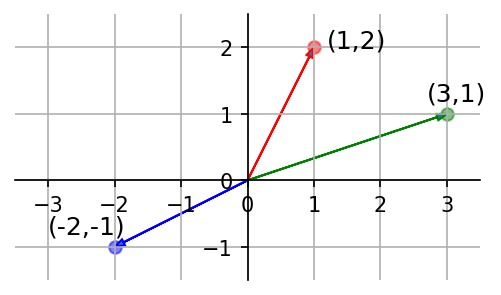

In [7]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
plt.scatter(1,2, c='r', alpha=0.5)
plt.arrow(0,0, 1,2, head_width=0.1, ec='r', length_includes_head=True)
plt.text(1.2,2, '(1,2)', fontsize = 12)
plt.scatter(3,1, c='g', alpha=0.5)
plt.arrow(0,0, 3,1, head_width=0.1, ec='g', length_includes_head=True)
plt.text(2.7,1.2, '(3,1)', fontsize = 12)
plt.scatter(-2,-1, c='b', alpha=0.5)
plt.arrow(0,0, -2,-1, head_width=0.1, ec='b', length_includes_head=True)
plt.text(-3,-0.8, '(-2,-1)', fontsize = 12)
plt.ylim(-1.5,2.5);
plt.xlim(-3.5,3.5);
axes_at_zero(ax)
plt.grid()

### Images as Points/Vectors Motivation

This geometric point of view allows us to consider the problem of data classification on a more abstract level.
Let's consider for example the problem of classifying images, say distinguishing between cats and dogs.  However, when we interpret the images as simply points in space, 
the problem becomes no different than other classification problems (although images do benefit from classification methods that build on the characteristics of this domain).  On this more abstract level, we seek to discover how to separate two groups of points.

Diving just a bit deeper with the Cat and Dog example. Here are two vectors representing the face of a dog and a cat. Notice this example motivates in practice what we are so far discussing in an abstract manner. Namely, patterns expressed as points/vectors.  Also, if you want to learn more about basics of working with images see the [Matplotlib Images Tutorial](https://matplotlib.org/tutorials/introductory/images.html)

In [8]:
import matplotlib.image as mpimg

In [9]:
# This code is kept as reference. It assumes image files are available.
# To keep this notebook self contained the pixels values are captured and held below in lists.

#dog99 = mpimg.imread('Dog99.png')
#cat00 = mpimg.imread('Cat00.png')
#foo = cat00.reshape(32*32)
#bar = [int(np.floor(x*255)) for x in foo]
#print(bar)

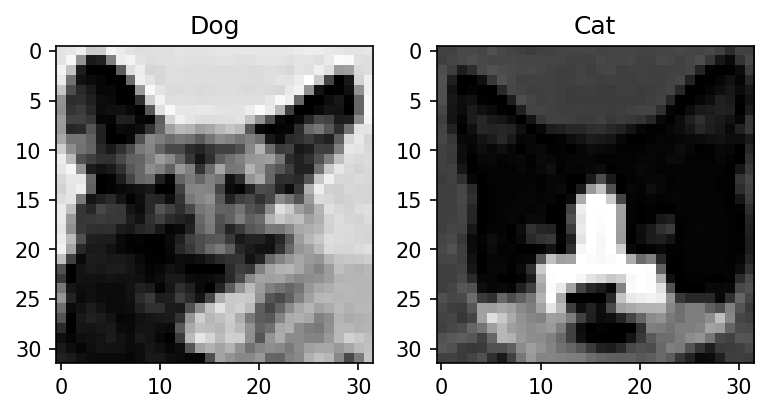

In [10]:
dogPix  = [197, 199, 207, 176, 177, 211, 204, 196, 193, 194, 195, 194, 198, 197, 196, 198, 199, 199, 199, 200, 200, 200, 199, 201, 203, 206, 205, 202, 200, 197, 198, 200, 197, 215, 126, 22, 28, 111, 206, 211, 196, 192, 195, 195, 196, 195, 194, 195, 196, 196, 194, 195, 197, 198, 198, 195, 198, 198, 193, 203, 218, 216, 195, 193, 211, 168, 25, 0, 0, 0, 80, 193, 206, 186, 188, 192, 193, 191, 192, 191, 191, 191, 191, 190, 190, 193, 191, 188, 197, 195, 208, 195, 134, 138, 189, 193, 203, 98, 15, 10, 6, 0, 0, 93, 208, 197, 187, 193, 193, 192, 192, 192, 192, 192, 192, 191, 190, 193, 197, 196, 205, 222, 175, 60, 0, 21, 184, 208, 171, 68, 37, 22, 6, 7, 0, 2, 132, 215, 198, 190, 190, 191, 189, 190, 192, 192, 190, 189, 191, 189, 187, 202, 209, 126, 17, 0, 2, 14, 126, 208, 129, 39, 41, 28, 11, 9, 1, 0, 41, 179, 210, 193, 195, 194, 192, 193, 194, 194, 194, 193, 194, 200, 216, 207, 90, 0, 0, 12, 21, 3, 88, 214, 124, 45, 53, 34, 10, 14, 15, 7, 1, 78, 195, 216, 200, 200, 202, 201, 198, 197, 196, 206, 217, 203, 158, 55, 0, 0, 8, 19, 18, 0, 88, 214, 135, 58, 57, 47, 6, 5, 29, 27, 6, 4, 82, 183, 208, 199, 192, 191, 192, 194, 196, 169, 126, 69, 9, 0, 8, 34, 62, 58, 26, 27, 120, 211, 133, 33, 37, 74, 28, 0, 10, 7, 13, 44, 89, 140, 161, 155, 138, 146, 160, 171, 162, 77, 7, 0, 4, 5, 39, 91, 104, 75, 40, 98, 197, 197, 147, 101, 102, 84, 29, 0, 0, 7, 71, 118, 109, 95, 105, 99, 79, 102, 121, 114, 102, 112, 99, 21, 8, 37, 41, 53, 38, 27, 82, 186, 202, 186, 180, 124, 99, 87, 35, 22, 42, 66, 106, 116, 87, 65, 63, 39, 32, 47, 58, 58, 70, 117, 155, 95, 52, 56, 21, 27, 55, 53, 111, 201, 197, 189, 206, 162, 71, 55, 44, 43, 63, 84, 86, 109, 136, 119, 87, 49, 18, 41, 80, 99, 112, 130, 133, 138, 102, 39, 28, 42, 70, 109, 167, 193, 189, 191, 200, 214, 129, 24, 16, 23, 43, 75, 90, 123, 111, 85, 131, 111, 45, 93, 144, 103, 105, 155, 131, 91, 75, 54, 28, 29, 99, 174, 200, 189, 184, 189, 189, 201, 201, 88, 1, 3, 26, 59, 88, 96, 28, 6, 87, 107, 89, 111, 100, 15, 38, 128, 147, 90, 40, 43, 37, 73, 172, 208, 187, 186, 190, 188, 183, 199, 208, 85, 0, 4, 8, 12, 16, 20, 0, 0, 58, 114, 117, 114, 61, 10, 4, 30, 68, 64, 32, 11, 48, 153, 206, 182, 180, 187, 185, 185, 193, 199, 106, 18, 29, 37, 18, 2, 12, 36, 32, 13, 46, 104, 117, 126, 78, 30, 55, 62, 43, 61, 121, 101, 72, 133, 190, 187, 180, 183, 186, 185, 204, 166, 47, 34, 62, 52, 50, 19, 10, 35, 72, 57, 40, 64, 103, 111, 86, 84, 100, 72, 62, 121, 193, 176, 138, 120, 156, 194, 187, 184, 191, 194, 203, 134, 47, 49, 53, 50, 48, 26, 16, 42, 56, 38, 32, 25, 90, 110, 71, 85, 110, 84, 93, 153, 175, 161, 166, 140, 152, 184, 191, 185, 183, 191, 199, 125, 49, 41, 40, 41, 24, 20, 33, 39, 21, 5, 8, 30, 85, 106, 66, 32, 51, 74, 82, 106, 103, 119, 146, 151, 158, 182, 190, 190, 186, 186, 205, 162, 70, 28, 26, 25, 9, 3, 5, 0, 1, 9, 27, 56, 66, 74, 78, 51, 21, 30, 30, 18, 33, 77, 137, 159, 173, 192, 190, 189, 187, 185, 210, 142, 36, 22, 23, 15, 8, 3, 2, 1, 0, 7, 34, 48, 66, 92, 105, 82, 35, 24, 16, 15, 44, 91, 130, 139, 162, 189, 186, 185, 190, 195, 167, 56, 9, 26, 24, 21, 22, 18, 8, 2, 1, 5, 11, 10, 14, 25, 37, 44, 46, 16, 31, 92, 114, 131, 144, 134, 128, 157, 171, 173, 175, 180, 70, 0, 17, 23, 21, 25, 25, 19, 11, 4, 7, 16, 11, 1, 0, 0, 0, 38, 54, 48, 111, 142, 155, 158, 144, 127, 113, 136, 166, 159, 155, 160, 50, 0, 16, 16, 15, 17, 14, 16, 14, 6, 11, 22, 22, 11, 9, 10, 16, 36, 64, 118, 141, 138, 142, 129, 118, 123, 126, 137, 156, 157, 157, 158, 104, 19, 12, 14, 10, 10, 10, 17, 28, 25, 5, 19, 41, 28, 9, 0, 32, 80, 128, 163, 135, 111, 100, 89, 101, 131, 144, 151, 160, 160, 157, 158, 130, 30, 9, 14, 11, 9, 10, 15, 38, 51, 25, 27, 54, 38, 18, 61, 150, 175, 176, 173, 128, 76, 65, 83, 112, 140, 158, 161, 157, 159, 158, 158, 95, 9, 16, 25, 16, 9, 10, 12, 28, 42, 41, 24, 22, 70, 122, 168, 196, 174, 181, 163, 82, 60, 86, 120, 144, 157, 141, 150, 161, 154, 160, 161, 72, 0, 21, 28, 25, 17, 6, 7, 15, 19, 21, 23, 44, 130, 179, 158, 167, 178, 151, 106, 80, 76, 115, 148, 152, 145, 112, 123, 156, 149, 153, 156, 37, 0, 19, 18, 21, 23, 9, 8, 17, 18, 13, 10, 78, 147, 167, 164, 157, 175, 161, 126, 86, 97, 145, 151, 120, 110, 106, 125, 159, 160, 155, 157, 13, 5, 13, 14, 17, 25, 15, 10, 22, 17, 7, 0, 52, 161, 199, 185, 163, 180, 179, 125, 74, 128, 149, 121, 121, 114, 114, 132, 160, 182, 173, 165, 23, 12, 6, 13, 17, 16, 15, 9, 12, 20, 14, 6, 12, 74, 142, 154, 142, 155, 127, 98, 116, 124, 118, 106, 122, 139, 144, 145, 133, 144, 162, 167, 28, 24, 14, 10, 8, 8, 8, 6, 11, 21, 21, 13, 9, 6, 5, 68, 141, 129, 118, 118, 131, 89, 88, 112, 119, 153, 166, 158, 118, 64, 107, 171]
catPix  = [65, 66, 74, 72, 69, 80, 71, 67, 64, 61, 65, 65, 68, 69, 69, 70, 67, 68, 69, 69, 67, 68, 69, 69, 72, 69, 68, 73, 65, 43, 65, 64, 63, 69, 74, 78, 72, 69, 71, 71, 69, 68, 69, 68, 68, 66, 66, 65, 71, 68, 68, 70, 65, 66, 72, 70, 66, 70, 78, 56, 23, 9, 51, 72, 77, 62, 28, 46, 73, 81, 76, 73, 70, 72, 69, 65, 63, 64, 67, 62, 68, 70, 62, 64, 66, 64, 64, 65, 66, 69, 37, 3, 0, 0, 12, 61, 81, 31, 0, 0, 15, 56, 81, 72, 64, 65, 66, 65, 63, 64, 68, 65, 62, 64, 63, 62, 64, 64, 64, 67, 71, 34, 0, 1, 6, 17, 6, 40, 80, 19, 0, 4, 0, 0, 40, 70, 67, 63, 64, 65, 63, 60, 62, 63, 60, 59, 63, 63, 61, 62, 64, 68, 40, 1, 0, 6, 13, 22, 11, 24, 78, 24, 13, 17, 3, 0, 0, 30, 77, 68, 63, 65, 63, 60, 61, 61, 61, 61, 61, 61, 61, 63, 67, 38, 0, 0, 6, 14, 33, 26, 2, 19, 70, 21, 11, 27, 16, 10, 2, 0, 33, 67, 68, 65, 62, 62, 63, 62, 62, 61, 62, 65, 67, 68, 49, 6, 0, 12, 25, 28, 34, 31, 0, 27, 63, 20, 5, 27, 39, 26, 22, 11, 0, 20, 56, 66, 65, 63, 59, 60, 66, 56, 60, 56, 52, 39, 8, 0, 12, 30, 47, 31, 25, 18, 6, 54, 68, 34, 0, 15, 38, 36, 38, 35, 15, 0, 8, 28, 32, 39, 39, 46, 49, 41, 34, 20, 6, 1, 2, 7, 12, 22, 39, 30, 23, 9, 33, 55, 71, 54, 8, 8, 19, 26, 40, 25, 6, 8, 1, 0, 3, 12, 19, 29, 25, 21, 7, 1, 0, 3, 5, 4, 6, 9, 11, 15, 18, 12, 12, 26, 64, 61, 13, 5, 14, 8, 15, 7, 0, 7, 9, 2, 3, 0, 5, 12, 9, 7, 2, 3, 3, 6, 5, 6, 12, 7, 1, 2, 9, 7, 0, 38, 66, 58, 13, 0, 7, 9, 4, 7, 8, 3, 10, 8, 3, 5, 7, 7, 3, 3, 4, 3, 6, 7, 4, 10, 9, 4, 3, 3, 7, 3, 0, 48, 64, 64, 22, 0, 3, 5, 3, 3, 7, 3, 8, 15, 2, 6, 5, 8, 12, 1, 4, 4, 9, 6, 3, 4, 4, 4, 4, 4, 4, 1, 21, 58, 61, 65, 49, 7, 0, 4, 4, 4, 3, 4, 3, 7, 6, 1, 0, 25, 76, 25, 0, 3, 6, 8, 7, 2, 4, 4, 4, 4, 1, 2, 53, 70, 64, 62, 71, 43, 0, 2, 4, 4, 4, 5, 3, 7, 9, 0, 27, 153, 196, 82, 0, 7, 4, 14, 7, 4, 5, 4, 4, 4, 2, 1, 44, 67, 64, 64, 72, 48, 1, 2, 4, 4, 6, 7, 5, 6, 1, 10, 171, 255, 255, 202, 69, 4, 3, 5, 2, 5, 5, 4, 4, 4, 4, 1, 20, 60, 64, 63, 70, 38, 0, 3, 4, 5, 5, 5, 8, 1, 0, 67, 239, 255, 254, 255, 161, 4, 0, 2, 0, 0, 4, 4, 4, 4, 4, 1, 3, 47, 64, 65, 70, 36, 0, 2, 4, 7, 3, 10, 9, 0, 0, 79, 230, 255, 253, 255, 160, 3, 0, 3, 24, 30, 3, 3, 4, 4, 4, 3, 0, 36, 63, 69, 67, 23, 0, 4, 4, 0, 13, 50, 38, 34, 1, 59, 234, 255, 251, 255, 157, 1, 14, 26, 49, 58, 1, 4, 5, 4, 4, 3, 1, 32, 69, 73, 56, 10, 3, 14, 6, 1, 9, 41, 50, 55, 4, 33, 228, 255, 247, 255, 156, 0, 12, 28, 32, 20, 2, 4, 4, 4, 4, 3, 2, 29, 71, 81, 62, 11, 2, 10, 3, 5, 0, 1, 5, 19, 0, 46, 247, 255, 248, 255, 206, 8, 0, 3, 8, 2, 3, 4, 4, 4, 4, 3, 2, 28, 68, 70, 63, 17, 0, 6, 5, 3, 5, 7, 88, 192, 160, 164, 255, 251, 248, 251, 255, 173, 107, 128, 39, 1, 1, 4, 4, 4, 4, 2, 5, 36, 63, 64, 67, 22, 0, 8, 7, 1, 10, 47, 204, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 99, 0, 1, 4, 4, 4, 4, 3, 13, 50, 63, 63, 72, 42, 7, 6, 0, 0, 3, 26, 177, 253, 255, 255, 246, 227, 215, 199, 209, 248, 255, 251, 175, 16, 0, 2, 2, 1, 0, 3, 43, 74, 63, 68, 86, 82, 13, 5, 9, 5, 32, 62, 165, 251, 234, 163, 68, 38, 26, 8, 130, 251, 255, 252, 224, 82, 1, 0, 0, 9, 8, 9, 72, 82, 80, 70, 74, 108, 59, 49, 102, 77, 98, 119, 179, 255, 168, 0, 0, 0, 0, 41, 196, 232, 238, 243, 236, 148, 57, 40, 40, 40, 8, 49, 101, 70, 72, 62, 60, 86, 160, 158, 167, 159, 138, 126, 163, 229, 186, 62, 14, 34, 13, 74, 160, 169, 178, 179, 181, 133, 110, 126, 125, 96, 81, 128, 84, 58, 67, 69, 55, 67, 161, 222, 200, 171, 146, 134, 129, 159, 155, 125, 66, 31, 11, 14, 37, 69, 102, 139, 146, 122, 112, 127, 126, 141, 191, 135, 71, 64, 64, 71, 76, 101, 116, 157, 183, 158, 149, 141, 148, 154, 125, 65, 12, 0, 4, 1, 0, 0, 49, 127, 124, 115, 126, 126, 132, 163, 155, 100, 76, 74, 81, 90, 93, 86, 64, 102, 182, 177, 152, 141, 140, 128, 105, 65, 16, 1, 0, 0, 0, 20, 56, 89, 109, 110, 123, 139, 148, 118, 72, 66, 85, 83, 87, 80, 61, 56, 59, 80, 81, 96, 139, 158, 145, 132, 113, 101, 84, 58, 32, 29, 43, 74, 80, 75, 104, 126, 121, 83, 53, 29, 58, 60, 63, 74, 64, 64, 59, 68, 80, 46, 25, 65, 120, 153, 131, 133, 130, 126, 125, 110, 100, 96, 94, 96, 88, 94, 106, 93, 55, 34, 10, 12, 33, 62, 64, 59]
dogPixN = [(x / 255.0) for x in dogPix]
catPixN = [(x / 255.0) for x in catPix]
dog99_1024 = np.array(dogPixN)
cat00_1024 = np.array(catPixN)
dog99_32x32 = dog99_1024.reshape((32,32))
cat00_32x32 = cat00_1024.reshape((32,32))
# Now build the plot figure with the dog and cat image
fig     = plt.figure()
ax1     = fig.add_subplot(1, 2, 1)
dogplot = plt.imshow(dog99_32x32, cmap="gray")
ax2     = fig.add_subplot(1, 2, 2)
catplot = plt.imshow(cat00_32x32, cmap="gray")
ax1.set_title('Dog')
ax2.set_title('Cat')
None

### Vectors as directions

There is a second point of view of vectors: as **directions** in space. 
In this way, we consider all the vectors in the figure below as being the same.

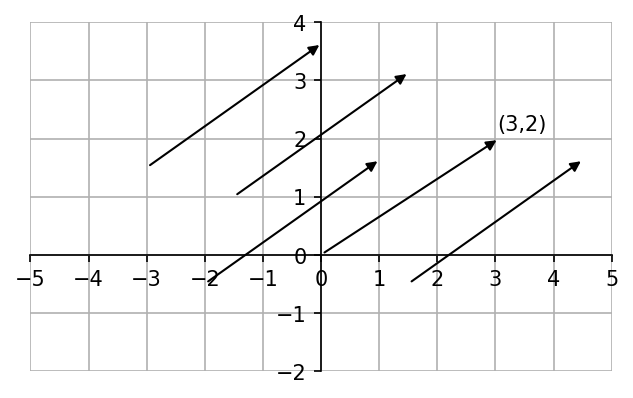

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.annotate("(3,2)", xy =(0,0), xytext=(3.03,2.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(1.5,-0.5), xytext=(4.53,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-2,-0.5), xytext=(1.03,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-1.5,1), xytext=(1.53,3.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-3,1.5), xytext=(0.03,3.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));

plt.ylim(-2,4);
plt.xlim(-5,5);
axes_at_zero(ax)
plt.grid()

## Operations on vectors

### Vector addition

Vectors of same size can be added together. Addition is performed *elementwise*:


In [12]:
u = np.array([2, 5])
v = np.array([3, 1])

print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Keep in mind that the `+` operator for Python lists does something else altogether!

The geometric view of vectors helps us make visual sense of vector addition: we follow the direction given by one vector, and then follow the direction given by the other:

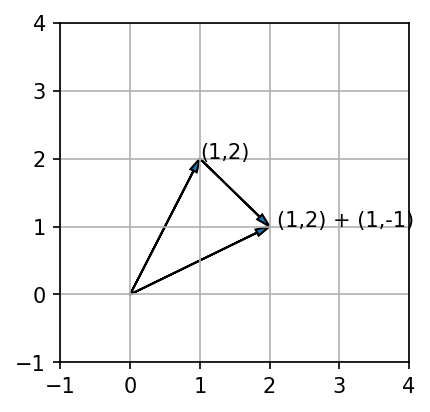

In [13]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

u = np.array([1, 2])
v = np.array([1, -1])

plot_vector(u)
plot_vector(v, origin=u)
plot_vector(u+v)

plt.text(1,2, "(1,2)");
plt.text(2.1,1, "(1,2) + (1,-1)")

plt.ylim(-1,4);
plt.xlim(-1,4);
plt.grid()
#axes_at_zero(ax)


This geometric perspective also demonstrates that vector addition is commutative, i.e. the order in which you add vectors does not matter:

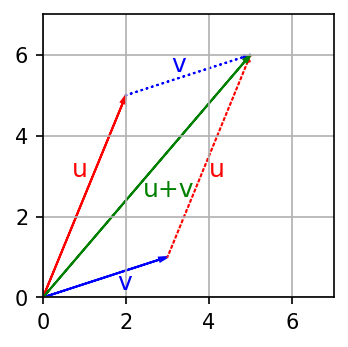

In [14]:
u = np.array([2, 5])
v = np.array([3, 1])

plt.figure(figsize=(2.5,2.5))

plot_vector(u, color="r")
plot_vector(v, color="b")
plot_vector(v, origin=u, color="b", linestyle="dotted")
plot_vector(u, origin=v, color="r", linestyle="dotted")
plot_vector(u+v, color="g")

plt.axis([0, 7, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=12)
plt.text(4, 3, "u", color="r", fontsize=12)
plt.text(1.8, 0.2, "v", color="b", fontsize=12)
plt.text(3.1, 5.6, "v", color="b", fontsize=12)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=12)
plt.grid()

### Exercise:

* Given a vector $\mathbf{v}$, what is the direction given by $-\mathbf{v}$?

Vector subtraction has a similar interpretation that follows from the following identity:

$$ \mathbf{u} - \mathbf{v} = \mathbf{u} + (\mathbf{-v}) $$

By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction 
that takes us from the point $\mathbf{u}$ to the point $\mathbf{v}$.

### Multiplication by a scalar

A vector can be multiplied by a scalar (i.e. number).  The result is a vector where all elements of the vector are multiplied by that number.
Here's an example of that in Numpy:

In [15]:
u = np.array([2, 5])

number = 1.5
print(number, " * ", u, "=")

number * u

1.5  *  [2 5] =


array([3. , 7.5])

Let's get an intuition of what scalar multiplication does:

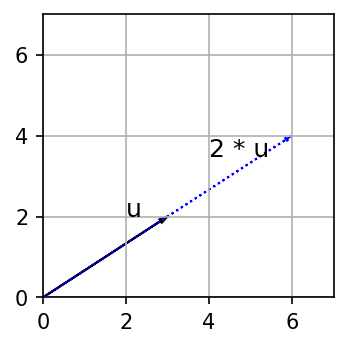

In [16]:
u = np.array([3, 2])
a = 2

plt.figure(figsize=(2.5,2.5))

plot_vector(u)
plot_vector(a * u, color="b", linestyle="dotted")
plt.text(2, 2, "u", color="k", fontsize=12)
plt.text(4, 3.5, str(a)+ " * u", color="k", fontsize=12)
plt.axis([0, 7, 0, 7])
plt.grid()

* Looking at this figure, what can you say about the direction defined by a vector $\mathbf{u}$ and $a \cdot \mathbf{u}$, where $a \in\mathbb{R}$?

## The norm of a vector

The length of a vector in two dimensions $\mathbf{v} = (v_1, v_2)^\top$ is given by $\sqrt{v_1^2 + v_2^2}$.  This is a simple application of the Pythagorean theorem.
For example:

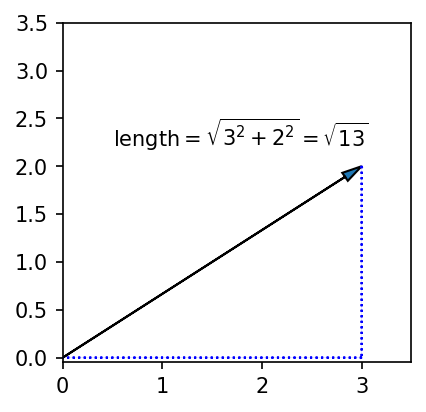

In [17]:
fig=plt.figure(figsize=(3,3))
#plt.grid()
plot_vector((3,2))
plt.ylim(-0.05,3.5);
plt.xlim(0,3.5);
plt.arrow(3,0,0,2, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.arrow(0,0,3,0, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.text(0.5,2.2 , r'$\mathrm{length} = \sqrt{3^2+2^2}=\sqrt{13}$');


For a vector in $d$ dimensions the length or **norm** of a vector is given by:

$$
||\mathbf{v}|| = \sqrt{\sum_{i=1}^d v_i^2},
$$
where $\mathbf{v} = (v_1, v_2,\ldots,v_d)^\top$.

This is such a common operation that Numpy has a special command for it:

In [18]:
np.linalg.norm(np.array([1,3,5]))

5.916079783099616

### Exercise:

* Write pure Python code that verifies that `np.linalg.norm` is giving the expected result.

In [19]:
def norm(a_list) :
    """
    Compute the norm of the given vector, provided as a python list
    
    """
   
    return 0

norm([1,3,5])

0

### Unit vectors

A vector with a norm equal to 1 is called a **unit vector**.

Given a vector $\mathbf{u}$ it is easy to make it into a unit vector by dividing by its norm:

$$
\hat{\mathbf{u}} = \frac{\mathbf{u}}{||\mathbf{u}||}
$$

This operation is called *normalization*.  It produces a vector that points in the same direction of the original vector.

From our discussion above, we now know that a unit vector captures the direction a vector points at.

In fact, any vector can be represented as:

$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$

where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  In other words, a vector is determined by its direction, and length.
Or in other words, think of a vector as a direction, and the size of the step to take in that direction.


### Exercise:

* Write code for converting a vector to a unit vector.  Verify graphically that you obtained the expected result.

In [20]:
def normalize(vector):
    return vector

# plot a vector before/after normalization use the function plot_vector
# shown at the top of the notebook

## The dot product

The **dot product** between two vectors $\mathbf{u}$ and $\mathbf{v}$ is defined as:

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i v_i.$$

The dot product is often represented using the *dot* operator as $\mathbf{u}\cdot\mathbf{v}$.

We note that the dot product is symmetric, i.e. does not depend on the order of its operands:

$$
\mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u}.
$$

You can compute the dot product using Numpy:

In [21]:
u = np.array([1, 0, 1])
v = np.array([0, -1, 2])
np.dot(u,v)

2

The `dot` function can be invoked as a method or using the `@` operator:

In [22]:
print(u.dot(v), u @ v)

2 2


And to round things off, here's a pure Python implementation:

In [23]:
u = [1, 0, 1]
v = [0, -1, 2]
sum(a*b for a,b in zip(u,v))

2

### Exercise

* We have already seen how the `*` operator functions between a scalar and a vector in Numpy.  It also works between vectors.  However, the vectors need to be of the same size.

In [24]:
## define two one-dimensional numpy arrays of the same size and 
## check what is the result of multiplying them using the * operator
foo = np.array(u)
bar = np.array(v)
foo * bar


array([0, 0, 2])

### Geometric interpretation of the dot product

The dot product also admits a geometric interpretation: it is closely related to the angle between two vectors.

We'll start by considering the dot product between two unit vectors in two dimensions.

We'll show that the dot product of two unit vectors is equal to the cosine of the angle between them.
To demonstrate that, let us consider:

$$
\hat{\mathbf{u}} = [1,0]^\top \; \text{and} \; \hat{\mathbf{v}} = [\cos(\theta), \sin(\theta)]^\top.
$$

The vector $\hat{\mathbf{u}}$ is parallel to the $x$-axis, 
and $\hat{\mathbf{v}}$ is at an angle $\theta$ with respect to the $x$-axis.

We can easily compute the dot product between these vectors:

$$
\hat{\mathbf{u}}^\top \hat{\mathbf{v}} = \cos(\theta)
$$

Now, as we have seen above, every vector $\mathbf{u}$ can be expressed as:

$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$

where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  

Using this property, we can now compute the dot product between any two vectors in two dimensions as:

$$
\mathbf{u}^\top \mathbf{v} = ||\mathbf{u}|| \; ||\mathbf{v}|| \;\hat{\mathbf{u}}^\top \hat{\mathbf{v}} = ||\mathbf{u}|| \; ||\mathbf{v}|| \cos(\theta)
$$

This fact is true in [general](https://en.wikipedia.org/wiki/Dot_product), i.e. for vectors in any dimension and orientation.

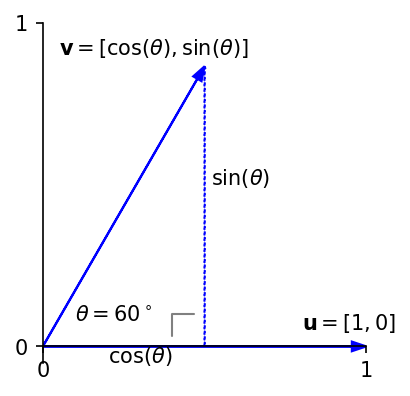

In [25]:
#plt.xkcd(scale=0., randomness=2)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.arrow(0,0,0.5,0.866, width=0.001, head_width=0.03, length_includes_head=True, alpha=1, linestyle='-',color='b');
plt.ylim(-0.05,1);
plt.xlim(0,1);
ax.arrow(0,0,1,0, width=0.001, head_width=0.03, length_includes_head=True, alpha=1, linestyle='-',color='b');
ax.arrow(0.5,0,0,0.866, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
ax.text(0.8, 0.05, r'$\mathbf{u}=[1,0]$')
ax.text(0.05, 0.9, r'$\mathbf{v}=[\cos(\theta), \sin(\theta)]$')
plt.text(0.1,0.08 , r'$\theta = 60^\circ$');
plt.text(0.52, 0.5, r'$\sin(\theta)$');
plt.text(0.2, -0.05, r'$\cos(\theta)$');

ax.annotate("", xy=(0.4, 0), xycoords='data', xytext=(0.5, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="-", color="0.5", shrinkA=5, shrinkB=5, patchA=None, patchB=None, connectionstyle="angle,angleA=0,angleB=90,rad=0"))
axes_at_zero(ax)

### Orthogonality

Vectors for which the dot product is equal to zero are called **orthogonal**.

### Questions

* What is the angle between orthogonal vectors?

* What can you say about the angle between vectors that have positive coefficients?

* Express the norm of a vector as a dot product.

To help you with this here's a plot of the sine and cosine functions:

And this [Sine and Cosine Animation with the Unit Circle](https://www.desmos.com/calculator/cpb0oammx7) nicely shows the deep connection.

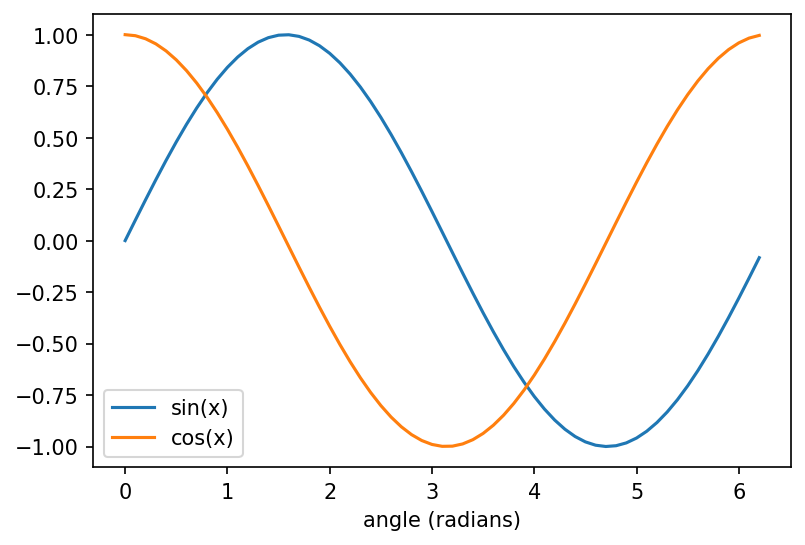

In [26]:
x = np.arange(0,2*np.pi,0.1)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,x,z)
plt.xlabel('angle (radians)')
plt.legend(['sin(x)', 'cos(x)']);

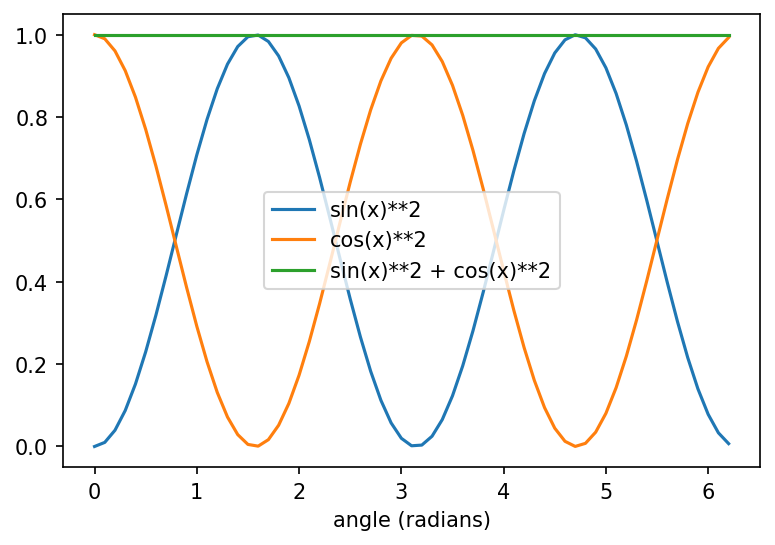

In [27]:
x = np.arange(0,2*np.pi,0.1)
y = np.sin(x)**2
z = np.cos(x)**2
w = y + z
plt.plot(x,y,x,z,x,w)
plt.xlabel('angle (radians)')
plt.legend(['sin(x)**2', 'cos(x)**2', 'sin(x)**2 + cos(x)**2']);


### Cosine similarity

In machine learning the cosine of the angle between two vectors is a common way to express their similarity

$$
\cos(\theta) = \frac{\mathbf{v}^\top \mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$ 
when the two vectors point in the same direction, is equal to
$-1$ when they point in opposite directions,
and takes on the value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.

### Exercise

* Use Numpy to write code that computes the cosine between two vectors with an arbitrary number of dimensions.
Use your code to compute the angle between

$$
\mathbf{u} = \begin{pmatrix}
1 \\ 0 \\ -1 \\ 2
\end{pmatrix}, \qquad  \mathbf{v} = \begin{pmatrix}
3 \\ 1 \\ 0 \\ 1
\end{pmatrix}
$$

In [28]:
def cosine(u, v) :
    return 0

# Projection onto an Axis

Another very powerful aspect of the dot product is how the dot product onto a unit length vector reveals the distance from the origin of *any* point as measured in that direction. 

Here is one way to think of what is happending. Consider how to answer this question: how far has a space ship leaving the earth traveled with it passes closest to an arbitrary point in space?

In [29]:
def fly_by_closest (x, y, dx, dy) :
    p = np.array([x, y])
    v = np.array([dx, dy])
    print(f"v = {v}")
    v = v / np.linalg.norm(v)
    print(f"new v = {v}")
    return p @ v

In [30]:
fly_by_closest( 10, 0, 1, 1)

v = [1 1]
new v = [0.70710678 0.70710678]


7.071067811865475

Please go off and think about this apparently simply example problem and how it relates more generally to the way we define the coordinates of points in a space.

## Summary

* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle between vectors of arbitrary dimensions.

Some additional optional reading on the topic of points and vectors include:

* [Univeristy of Wisconsin Fall 2014 - CS559 Computer Graphics](https://graphics.cs.wisc.edu/WP/cs559-fall2014/2014/08/28/points-vectors-and-coordinate-systems-why-are-points-and-vectors-different/)
* [CSU CS410 Fall 2020 Basic Geometry](https://www.cs.colostate.edu/~cs410/yr2020fa/more_progress/show02/all_slides.php)


# Part 2: Matrices

To say that matrices are nothing more than tools to compute multiple dot products at one time is a profound under-selling of matrices as a concept. That word of caution aside, if you simply begin to understand intuitively the above comment you are well ahead of the game when starting to think about how to transform high-dimensional data as part of a larger machine learning process.

# Matrices and matrix operations

In this notebook we will introduce matrices as an efficient way to store and manipulate datasets.  We will describe them from a mathematical perspective, and how they are implemented in Python using Numpy.

A **matrix** is a rectangular array of scalar values (i.e. numbers), which are the **elements** of the matrix.
For example

\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix}

Like, vectors, matrices are ubiquitous in machine learning.
In fact, it's going to be very useful to think of a matrix as a list of vectors.
Those vectors, either make up the rows or columns of the matrix, as we will see below.

With that in mind, matrices provide us the means to express operations on multiple vectors all at once, which in Numpy, will lead to more efficient code.

### Matrices in Python

As was the case for vectors, we can represent matrices using Python lists.  Except, that here, we use lists-of-lists:

In [31]:
X = [
    [1, 2, 3],
    [4, 5, 6]
]

Numpy provides a much more efficient way to represent and manipulate matrix.  It also supports optimized implementations of many matrix operations.  So instead, we will opt for:


In [32]:
X = np.array([
    [1, 2 ,3],
    [4, 5, 6]
])
X

array([[1, 2, 3],
       [4, 5, 6]])

By convention, we will use uppercase names to refer to matrices.


### The shape of a matrix

The shape of a matrix is its number of rows and columns.
By convention, an $n \times m$ matrix has $n$ rows and $m$ columns.
For example, the matrix $X$ defined above is a $2 \times 3$ matrix.

In Numpy, the shape attribute provides that information:

In [33]:
X.shape

(2, 3)

**Note**: the size attribute of a Numpy array is its total number of elements.

### Indexing

The number in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes denoted as $X_{i,j}$ or $X_{ij}$.
Using this notation we can express a matrix $X$ from its elements as:

$$
X = \begin{pmatrix}
  X_{1,1} & X_{1,2} & X_{1,3} &\ldots & X_{1,m}\\
  X_{2,1} & X_{2,2} & X_{2,3} & \ldots & X_{2,m}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  X_{n,1} & X_{n,2} & X_{n,3} & \cdots & X_{n,m}\\
\end{pmatrix}
$$

In math indices generally start at 1. But in programming we use 0-based indexing. So to access $X_{2,3}$ programmatically, we need to write this:

In [34]:
X[1,2]  # 2nd row, 3rd column

6


### Matrices for representing machine learning data

Recall that we defined a labeled dataset as a collection of vectors and their associated labels:
$
\mathcal{D} = \{ \;(\mathbf{x}_i, y_i) \; \}_{i=1}^N,
$
where $\mathbf{x}_i \in \mathbb{R}^d$ and $y_i$ is the label associated with $\mathbf{x}_i$.

As we have seen before, the collection of feature vectors in a dataset can be combined into a matrix $X$ whose rows are the vectors $\mathbf{x}_i$, i.e.

$$
X = \begin{pmatrix}
  - & \mathbf{x}_1^\top & - \\
  - & \mathbf{x}_2^\top & - \\
   & \vdots &  \\
  - & \mathbf{x}_N^\top & - \\
\end{pmatrix}
$$


The matrix $X$ has dimensions $N \times d$.



### Operations on matrices

Matrices support addition and multiplication by a scalar, in the same we have seen for vectors.


#### Matrix-vector multiplication

Given a matrix $X$ of size $N \times d$ and a $d$ dimensional vector $\mathbf{w}$, we can define the matrix-vector product $X \mathbf{w}$ to be an $N$-dimensional vector 

$$
X \mathbf{w} = ( \mathbf{x}_1^\top \mathbf{w}, \ldots, \mathbf{x}_N^\top \mathbf{w}),
$$

where $\mathbf{x}_1, \ldots ,\mathbf{x}_N$ are the vectors that make up the rows of $X$.

Also, just a slight change in notation to make dot product explicit

$$
X \mathbf{w} = ( \mathbf{x}_1 \cdot \mathbf{w}, \ldots, \mathbf{x}_N \cdot \mathbf{w}),
$$

In Numpy this operation can be performed by the same function used for dot-products between vectors:


In [35]:
X = np.array([
    [1, 2 ,3],
    [4, 5, 6]
])
w = np.array([1,1,1])
np.dot(X, w)

array([ 6, 15])

An equivalent way of expressing the matrix-vector product uses the `@` operator:

In [36]:
X @ w

array([ 6, 15])

The same result can be obtained by stacking dot products row by row (but with a loss of efficiency):

In [37]:
np.array([np.dot(X[0], w), np.dot(X[1], w)])

array([ 6, 15])

This operation is very useful for expressing the workings of a linear model on an entire dataset.

The matrix-vector product requires that the number of columns of the matrix matches the length of the vector.  It is therefore sensitive to the order of its arguments:

In [38]:
try :
    print(np.dot(w, X))
except :
    print("the order of arguments matters for np.dot")
        

the order of arguments matters for np.dot



The matrix-vector product discussed above is a special case of the general matrix multiplication operation.  We will defer its definition until it is needed for neural networks.

The `@` operator was introduced in version 3.5 of Python (the following document discusses the official [proposal](https://www.python.org/dev/peps/pep-0465/) for adding it to the language).

